<div style="line-height:0.45">
<h1 style="color:#0DB1A7  "> Softmax example 2 </h1>
</div>
<div style="line-height:0.5">
<h4> Softmax Regression using "mlxtend" softmax on fetch_openml dataset.
</h4>
<div style="margin-top: -4px;">
<span style="display: inline-block;">
    <h3 style="color: lightblue; display: inline;">Keywords:</h3> fetch_openml dataset + StandardScaler + numpy errstate + meshgrid
</span>
</div>
<br>
<div style="margin-top: 4px;">
<div style="line-height:1.2">
<span style="display: inline-block;">
    <h3 style="color: red; display: inline;">Notes:</h3>  Softmax Regression is a Classification method!
</span>
</div>
</div>

In [3]:
%%script echo Skipping since mlxtend is already installed
!pip install --upgrade mlxtend

Skipping since mlxtend is already installed


In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_openml
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score

from mlxtend.classifier import SoftmaxRegression

In [7]:
## Load
dataset_cards = fetch_openml(name='creditcard', version=1, as_frame=True, parser='auto')  #parser='auto' => to avoid the FutureWarning
type(dataset_cards), dataset_cards.data.head()

(sklearn.utils._bunch.Bunch,
          V1        V2        V3        V4        V5        V6        V7  \
 0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
 1  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
 2 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
 3 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
 4 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   
 
          V8        V9       V10  ...       V20       V21       V22       V23  \
 0  0.098698  0.363787  0.090794  ...  0.251412 -0.018307  0.277838 -0.110474   
 1  0.085102 -0.255425 -0.166974  ... -0.069083 -0.225775 -0.638672  0.101288   
 2  0.247676 -1.514654  0.207643  ...  0.524980  0.247998  0.771679  0.909412   
 3  0.377436 -1.387024 -0.054952  ... -0.208038 -0.108300  0.005274 -0.190321   
 4 -0.270533  0.817739  0.753074  ...  0.408542 -0.009431  0.798278 -0.137458   
 
         V24       V25   

In [8]:
### Sampling 
X = dataset_cards.data
y = dataset_cards.target.astype(int)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalize 
scaler = StandardScaler()
## Train
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [10]:
print("X_train.shape = " ,X_train.shape)
print("X_test.shape = " ,X_test.shape)
print("y_train.shape = " ,y_train.shape)
print("y_test.shape = " ,y_test.shape)

X_train.shape =  (227845, 29)
X_test.shape =  (56962, 29)
y_train.shape =  (227845,)
y_test.shape =  (56962,)


In [11]:
num_unique_X_train = len(np.unique(X_train))
num_unique_X_test = len(np.unique(X_test))
num_unique_y_train = len(np.unique(y_train))
num_unique_y_test = len(np.unique(y_test))

print(f"num_unique_X_train => {num_unique_X_train}")
print(f"num_unique_X_test => {num_unique_X_test}")
print(f"num_unique_y_train => {num_unique_y_train}")
print(f"num_unique_y_test => {num_unique_y_test}")

num_unique_X_train => 6228205
num_unique_X_test => 1589004
num_unique_y_train => 2
num_unique_y_test => 2


In [12]:
#X_test.head() ##no! AttributeError: 'numpy.ndarray' object has no attribute 'head'
X_test[:3]

array([[-8.43953559e+00,  5.18252006e+00, -1.23132500e+01,
         6.71473063e+00, -9.94103231e+00, -2.11833498e+00,
        -1.34321838e+01,  6.32464612e+00, -7.75182381e+00,
        -1.29838058e+01,  5.18902663e+00, -1.08139804e+01,
         1.67873744e+00, -9.76999304e+00,  3.94728463e-01,
        -1.12833432e+01, -2.25888621e+01, -1.00213793e+01,
         3.80892357e+00, -1.95767041e+00,  1.62503255e+00,
        -1.55306719e+00, -3.76135526e+00,  1.11270028e+00,
        -2.70759003e+00, -9.58810527e-01, -5.02350367e+00,
        -3.16294175e+00,  1.08151380e+00],
       [ 1.73053399e-01, -1.65602032e+00, -8.79140088e-02,
        -9.77696052e-01, -1.04665800e+00,  7.60397307e-01,
        -4.22575724e-01,  1.88823961e-01,  8.18900234e-01,
        -5.18804110e-01, -8.64208699e-02,  9.79145681e-01,
         7.71702924e-02, -2.27095291e-01, -1.49729204e-01,
        -2.44310412e+00,  1.48353899e-01,  2.09181926e+00,
         5.31046507e-01,  6.53253563e-01, -2.91628383e-01,
        -1.29

In [13]:
print(type(X_train))
print(type(y_train))
print(X_train.dtype)
print(y_train.dtype)


print(np.isnan(X_train).sum())
print(np.isnan(X_test).sum())
print(np.isnan(y_train).sum())
print(np.isnan(y_test).sum())

<class 'numpy.ndarray'>
<class 'pandas.core.series.Series'>
float64
int64
0
0
0
0


In [14]:
""" Tranform the target 1D pandas array to a ndarray that is the correct format to make classificator works. """

if type(y_train) != 'numpy.ndarray':
    y_train = y_train.values
print(type(y_train))
y_train

<class 'numpy.ndarray'>


array([0, 0, 0, ..., 0, 0, 0])

#### => Softmax Regression model

In [15]:
softmax_reg = SoftmaxRegression(epochs=100, eta=0.1, minibatches=50, random_seed=42)
with np.errstate(divide='ignore', invalid='ignore'):            #to avoid warnings
    softmax_reg.fit(X_train, y_train)

## Predict
y_pred = softmax_reg.predict(X_test)

In [16]:
accuracy = np.mean(y_pred == y_test)
print('Accuracy:', accuracy)

Accuracy: 0.9989291106351603


In [17]:
cm = confusion_matrix(y_test, y_pred)
print('Confusion matrix:\n', cm)

Confusion matrix:
 [[56826    38]
 [   23    75]]


In [18]:
precision = precision_score(y_test, y_pred, average='micro')
recall = recall_score(y_test, y_pred, average='micro')
f1 = f1_score(y_test, y_pred, average='micro')

print('Precision:', precision)
print('Recall:', recall)
print('F1 score:', f1)

Precision: 0.9989291106351603
Recall: 0.9989291106351603
F1 score: 0.9989291106351603


In [19]:
a = set(y_train)
a

{0, 1}

#### => Meshgrid

/home/notto4/anaconda3/envs/MLearning/lib/python3.10/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


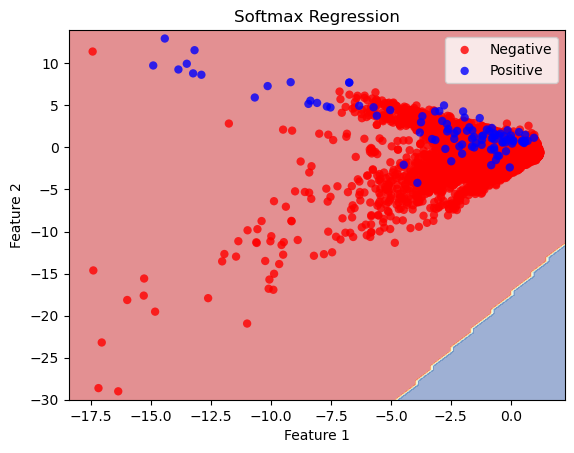

In [20]:
n_features = X_train.shape[1]
x_min, x_max = X_test[:, 0].min() - 1, X_test[:, 0].max() + 1
y_min, y_max = X_test[:, 1].min() - 1, X_test[:, 1].max() + 1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100), np.linspace(y_min, y_max, 100))

## Modify the meshgrid => 29 features
Z = np.zeros((xx.shape[0]*xx.shape[1], n_features))
Z[:, 0] = xx.ravel()
Z[:, 1] = yy.ravel()

## Normalize the meshgrid using the same input scaler 
Z_norm = scaler.transform(Z)

## Predict class labels for each point in the meshgrid
Z_labels = softmax_reg.predict(Z_norm)
## Reshape the predicted labels to match the shape of the meshgrid
Z_labels = Z_labels.reshape(xx.shape)

## Plot 
plt.contourf(xx, yy, Z_labels, alpha=0.5, cmap=plt.cm.RdYlBu)   #decision boundary
plt.scatter(X_test[y_test == 0, 0], X_test[y_test == 0, 1], c='red', label='Negative', alpha=0.8, edgecolors='none')
plt.scatter(X_test[y_test == 1, 0], X_test[y_test == 1, 1], c='blue', label='Positive', alpha=0.8, edgecolors='none')

plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Softmax Regression')
plt.legend()
plt.show()